In [1]:
import model
import os


Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("lstm_o/Reshape:0", shape=(?, ?, ?, 128), dtype=float32)
Tensor("lstm_o/Reshape:0", shape=(?, ?, ?, 128), dtype=float32)
Tensor("rpn_cls_score/Reshape:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_cls_prob:0", shape=(?, ?, ?, ?), dtype=float32)
Tensor("Reshape_5:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_bbox_pred/Reshape:0", shape=(?, ?, ?, 40), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)
INFO:tensorflow:Restoring parameters from /home/amax/Public/ShijieGeng/zf/BML/ocr/ctpn/checkpoints/model_final_tf13.ckpt


Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [2]:
from glob import glob
from IPython.display import Image as display
import numpy as np
from PIL import Image
import time
paths = glob('./test/*.*')
paths
name =  paths[0].split("/")[2].split(".")[0]

## pytorch crnn

识别结果:

m如果你要提前下车，请别推醒装睡的我
假装不知道你已经离开
这样我可以沉腼到终点


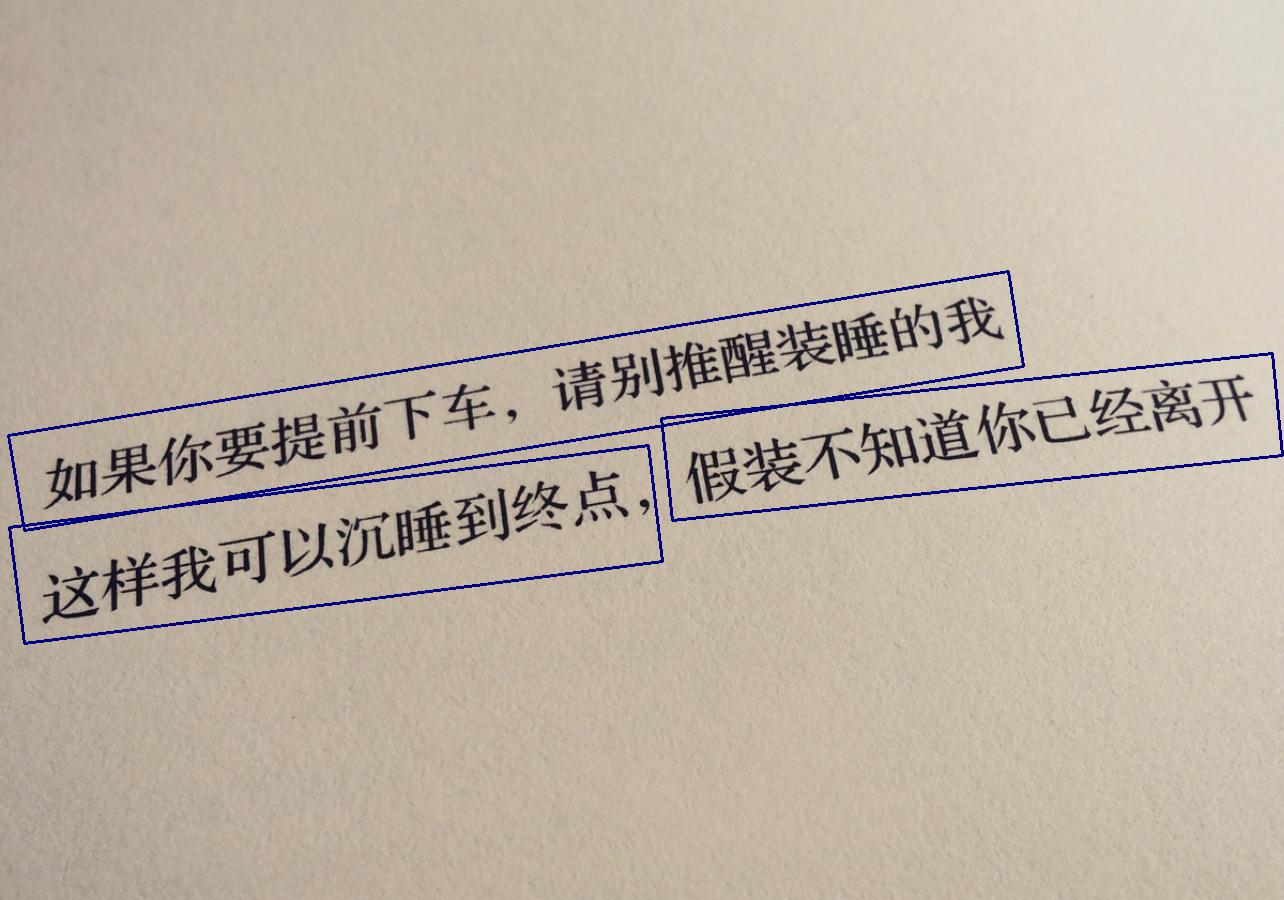

In [9]:
im = Image.open(paths[3])
img = np.array(im.convert('RGB'))
#t = time.time()
result,img = model.model(img,model='ocr') ## if model == crnn ,you should install pytorch
#print "It takes time:{}s".format(time.time()-t)
#print "---------------------------------------"
print "识别结果:\n"
Image.fromarray(img).save('/tmp/tmp.jpg')
for key in result:
    print result[key][1]
display('/tmp/tmp.jpg')

## keras crnn 

../ocr/test_results/kuaidi1.txt
It takes time:23.9782278538s
---------------------------------------
惨虎葬车困
: 绿绕军照
 uibu.en巡始区7 a年
00033347-54221g
门店退库货物交按满单
7w间z74:/g:4.9?f%
门店退库货物交按
任务编号:33347
省电区该跃直所币百
捉货司机!许杨乎机;13855420186
恨负司扫巡煞a
 正画B虽
任务编号:3323]
 些达a
三 @
门唇炮址:
名贸
上逢正重昆区置盈暨2虽_
零诱
任重重重距区画盈堕2是氢贡人
仓座她灶
转容隐班
王逐孟顶存区置延禹亟335再蛋瑶赢直香盈画重画重
“律蛋盈人
  币阅盈逐召画
:仁犀地姓
产 已，应，李
订单号
PJD
产屈多森
备注
息 
PlD
订阶丹
:[可伍意圆色强加】忍
 ,正722523315
ctclAluFro*-;fil/"》金窜长威肪凉冷
 BR-BrgT   790468’束7g型资下贺  点lg~G3
 
(-25-*-2英逼 虽旦墓 
  。歹
.es7o)
! "._174:Da
门店受使时危:
 店负面人
百Al负w国
绳点司帆:
 ] A玄八
夕
心犀丞收的尼
仓冬垒收人:
'货马al_
esa*公~


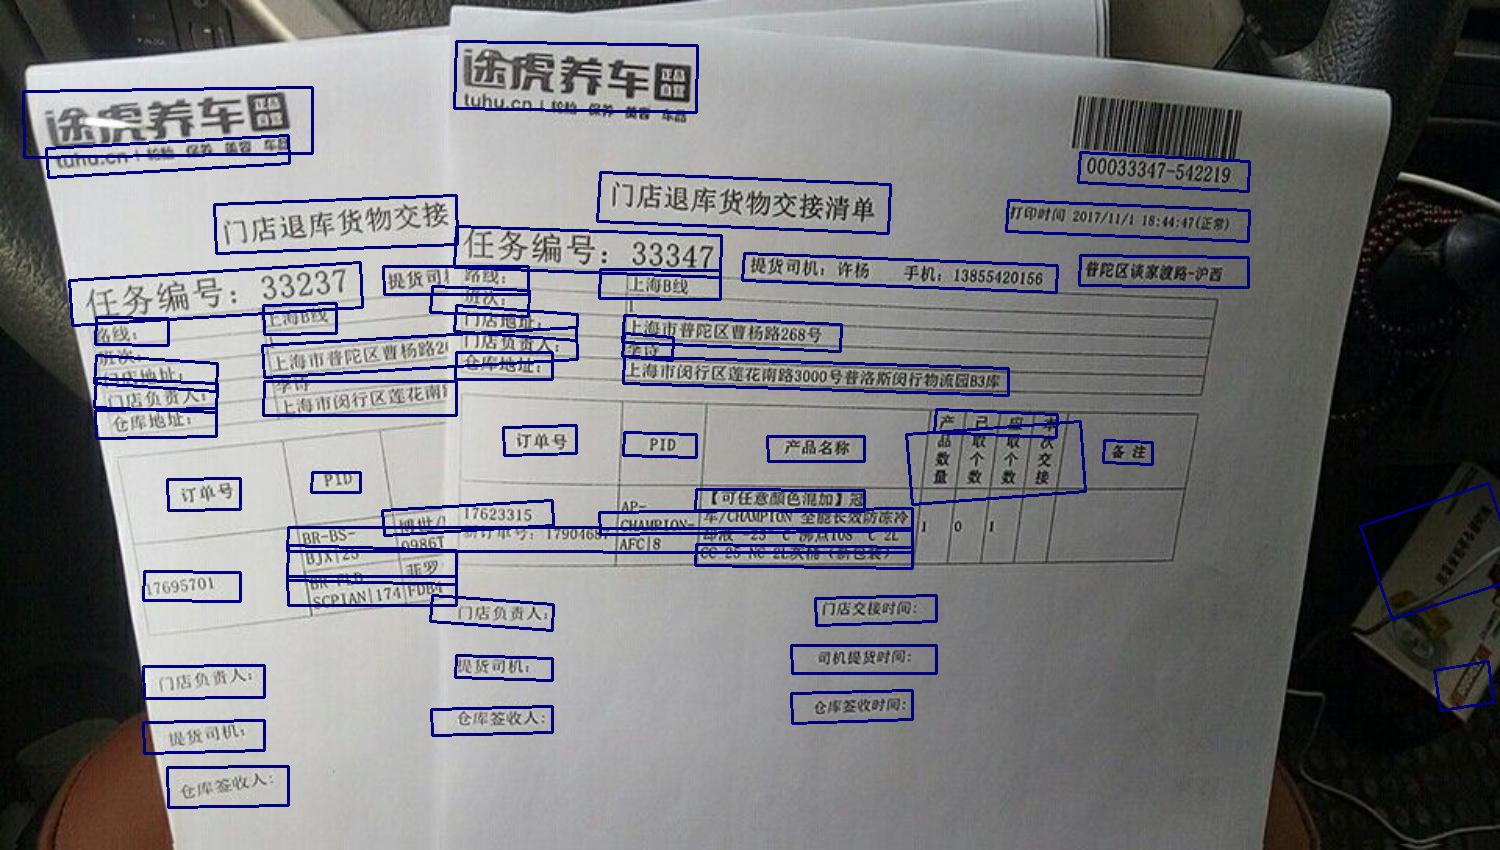

In [15]:
#Choose paths[0],paths[1] or paths[2] for test
im = Image.open(paths[0])
name =  str(paths[0].split("/")[2].split(".")[0]) + ".txt"
output_path = "../ocr/test_results/" + name

print output_path


img = np.array(im.convert('RGB'))
t = time.time()
result,img = model.model(img,model='keras') ##if model == keras ,you should install keras
print "It takes time:{}s".format(time.time()-t)
print "---------------------------------------"
Image.fromarray(img).save('/tmp/tmp.jpg')
text_file = open(output_path, "w")
for key in result:
    print result[key][1]
    #text_file = open(name, "w")
    text_file.write(result[key][1].encode("utf-8"))
    #text_file.close()
text_file.close()
    
display('/tmp/tmp.jpg')